In [1]:
import pandas as pd #import pandas for dataframe manipulation
import numpy as np #import numpy for numeric operations
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import LabelEncoder
from dateutil import parser
from sklearn.pipeline import Pipeline  
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
k1 = pd.read_csv("part-00013-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
k2 = pd.read_csv("part-00015-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
k3 = pd.read_csv("part-00017-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
k4 = pd.read_csv("part-00018-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
k5 = pd.read_csv("part-00019-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")

In [3]:
dataset1 = pd.merge(k1, k2, how='outer')
dataset2 = pd.merge(dataset1, k3, how='outer')
dataset3 = pd.merge(dataset2, k4, how='outer')
dataset = pd.merge(dataset3, k5, how='outer')

In [4]:
dataset

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,5.816370,108.00,6.00,64.00,0.343857,0.343857,0.0,0.0,0.0,0.0,...,0.000000,54.00,8.303384e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-TCP_Flood
1,0.000000,55.42,6.00,65.91,26.663175,26.663175,0.0,0.0,1.0,0.0,...,1.629676,55.42,8.298090e+07,9.5,10.429518,2.315457,53.666325,0.05,141.55,DoS-SYN_Flood
2,3.998994,108.00,6.00,64.00,0.500126,0.500126,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.298556e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DoS-SYN_Flood
3,0.005473,75.88,6.00,64.00,30.471866,30.471866,0.0,0.0,1.0,0.0,...,0.189108,54.24,8.308972e+07,9.5,10.396685,0.269256,0.518037,0.07,141.55,DDoS-SYN_Flood
4,0.003508,4325.00,17.00,64.00,101072.724442,101072.724442,0.0,0.0,0.0,0.0,...,0.000000,50.00,8.310311e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196342,0.000000,54.00,6.00,64.00,0.402951,0.402951,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.309343e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
1196343,0.000000,54.00,6.00,64.00,32.713846,32.713846,0.0,0.0,1.0,0.0,...,0.000000,54.00,8.308996e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SYN_Flood
1196344,0.000105,55.97,6.11,65.91,139.841348,139.841348,0.0,0.0,1.0,0.0,...,1.121194,54.27,8.309409e+07,9.5,10.426103,1.587651,8.632932,0.15,141.55,DDoS-SYN_Flood
1196345,0.055257,39140.00,16.20,73.55,14372.985563,14372.985563,0.0,0.0,0.0,0.0,...,1.967584,51.00,8.301154e+07,9.5,10.175256,2.786674,15.970146,0.25,141.55,DoS-UDP_Flood


In [5]:
dataset['label'].value_counts()

DDoS-ICMP_Flood            184933
DDoS-UDP_Flood             138690
DDoS-TCP_Flood             115464
DDoS-PSHACK_Flood          104442
DDoS-SYN_Flood             104369
DDoS-RSTFINFlood           103611
DDoS-SynonymousIP_Flood     91913
DoS-UDP_Flood               84754
DoS-TCP_Flood               68586
DoS-SYN_Flood               51824
BenignTraffic               28220
Mirai-greeth_flood          25148
Mirai-udpplain              22958
Mirai-greip_flood           19436
DDoS-ICMP_Fragmentation     11528
MITM-ArpSpoofing             7783
DDoS-UDP_Fragmentation       7412
DDoS-ACK_Fragmentation       7368
DNS_Spoofing                 4681
Recon-HostDiscovery          3522
Recon-OSScan                 2461
Recon-PortScan               2063
DoS-HTTP_Flood               1825
VulnerabilityScan             992
DDoS-HTTP_Flood               758
DDoS-SlowLoris                605
DictionaryBruteForce          326
SqlInjection                  154
BrowserHijacking              140
CommandInjecti

In [6]:
# merger all types of ddos attacks into a single ddos class
classes_to_merge = ['DDoS-ICMP_Flood','DDoS-UDP_Flood','DDoS-TCP_Flood','DDoS-PSHACK_Flood','DDoS-SYN_Flood','DDoS-RSTFINFlood','DDoS-SynonymousIP_Flood','DDoS-ICMP_Fragmentation','DDoS-UDP_Fragmentation','DDoS-ACK_Fragmentation','DDoS-HTTP_Flood','DDoS-SlowLoris']
new_positive_class = 'DDoS_class'
dataset['new_class'] = dataset['label']
dataset.loc[dataset['new_class'].isin(classes_to_merge), 'new_class'] = new_positive_class
dataset.loc[~dataset['new_class'].isin([new_positive_class]), 'new_class'] = 'Benign_class'
dataset.drop(columns=['label'], inplace=True)
dataset.rename(columns={'new_class': 'label'}, inplace=True)

In [7]:
dataset['label'].value_counts()

DDoS_class      871093
Benign_class    325254
Name: label, dtype: int64

In [8]:
X = dataset.iloc[:,0:-1]  #independent columns
y = dataset.iloc[:,-1]    #target column 

from sklearn.model_selection import train_test_split #Import Sklearn function train_test_split to spilt the dataset for training and testing


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)#split dataset using 80:20 ratio 80% for training and 20% for testing

from sklearn import tree #Load classifier function from sklearn library
clf = tree.DecisionTreeClassifier(criterion= "entropy") #Configure classifier
classify=clf.fit(X_train, y_train) #Apply classifier to training dataset 
y_pred = classify.predict(X_test)#Evaluate model by testing using the test dataset

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #import functions for result presentation and evaluation
accuracy_dt = accuracy_score(y_test, y_pred)
print("Accuracy for Decision Tree:", accuracy_dt)
print(confusion_matrix(y_test, y_pred)) #print confusion matrix
print(classification_report(y_test,y_pred)) #print report
print(accuracy_score(y_test, y_pred)) #print accuracy


Accuracy for Decision Tree: 0.9998913361474485
[[ 65147     12]
 [    14 174097]]
              precision    recall  f1-score   support

Benign_class       1.00      1.00      1.00     65159
  DDoS_class       1.00      1.00      1.00    174111

    accuracy                           1.00    239270
   macro avg       1.00      1.00      1.00    239270
weighted avg       1.00      1.00      1.00    239270

0.9998913361474485


In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
# Define selection method 
select = SelectKBest(mutual_info_classif, k=5)

# Find best features 
select.fit(X, y)
mask = select.get_support() 

# Print selected features
print('Best features selected:', X.columns[mask])


Best features selected: Index(['Min', 'Tot size', 'IAT', 'Number', 'Magnitue'], dtype='object')


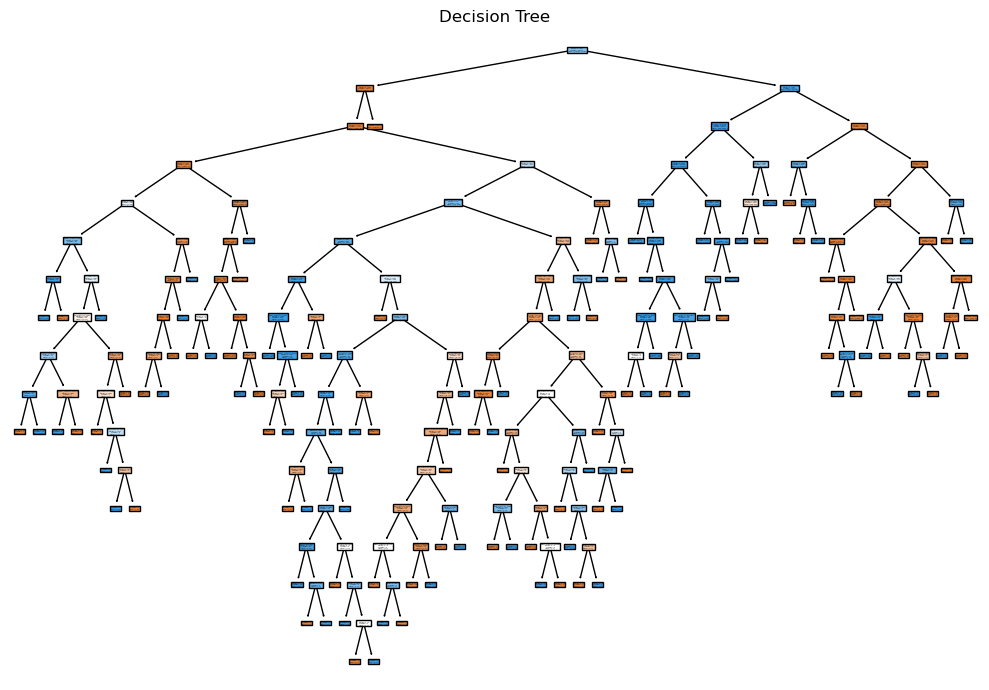

In [10]:
# Visualize the tree
fig, ax = plt.subplots(figsize=(10, 7))  
tree.plot_tree(clf, filled=True, feature_names=list(dataset.columns[:-1]), ax=ax)

ax.set_title("Decision Tree")
ax.set_ylabel('Feature')
ax.set_xlabel('Samples')

plt.tight_layout()
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dt_confusion=(confusion_matrix(y_test, y_pred))

ax = sns.heatmap(dt_confusion/np.sum(dt_confusion), annot=True, fmt='.2%', cmap='Purples')
ax.set_title(' Decision Tree Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Attacks')
ax.set_ylabel('Actual Attacks');
ax.xaxis.set_ticklabels(['Benign','DDoS'])
ax.yaxis.set_ticklabels(['Benign','DDoS'])

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print('Accuracy for KNN: ', knn_model.score(X_test, y_test)*100)
knn_pred = knn_model.predict(X_test)
knn_confusion=(confusion_matrix(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred)) #print confusion matrix
print(classification_report(y_test, knn_pred)) #print report


In [ ]:
ax = sns.heatmap(knn_confusion/np.sum(knn_confusion), annot=True, fmt='.2%', cmap='Purples')
ax.set_title(' KNN Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Attacks')
ax.set_ylabel('Actual Attacks');
ax.xaxis.set_ticklabels(['Benign','DDoS'])
ax.yaxis.set_ticklabels(['Benign','DDoS'])

plt.show()

In [ ]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)
print('Accuracy for Gradient Boosting Classifier: ', gbc_model.score(X_test, y_test)*100)
gbc_pred = gbc_model.predict(X_test)
gbc_confusion = confusion_matrix(y_test, gbc_pred)
print('Confusion Matrix for GBoost \n')
print(gbc_confusion)
print(classification_report(y_test, gbc_pred))

In [ ]:
ax = sns.heatmap(gbc_confusion/np.sum(gbc_confusion), annot=True, fmt='.2%', cmap='Purples')
ax.set_title(' GBC Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Attacks')
ax.set_ylabel('Actual Attacks');
ax.xaxis.set_ticklabels(['Benign','DDoS'])
ax.yaxis.set_ticklabels(['Benign','DDoS'])

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
print('Accuracy for RF: ', rf_model.score(X_test, y_test)*100)
rf_pred = rf_model.predict(X_test)
rf_confusion = confusion_matrix(y_test, rf_pred)
print('Confusion Matrix for Random Forest \n')
print(rf_confusion)
print(classification_report(y_test, rf_pred))

In [ ]:
ax = sns.heatmap(rf_confusion/np.sum(rf_confusion), annot=True, fmt='.2%', cmap='Purples')
ax.set_title(' RF Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Attacks')
ax.set_ylabel('Actual Attacks');
ax.xaxis.set_ticklabels(['Benign','DDoS'])
ax.yaxis.set_ticklabels(['Benign','DDoS'])

plt.show()

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(y_resampled.value_counts())  # Check the distribution after resampling

In [ ]:
X = dataset.iloc[:,0:-1]  #independent columns
y = dataset.iloc[:,-1]    #target column 

from sklearn.model_selection import train_test_split #Import Sklearn function train_test_split to spilt the dataset for training and testing


# Splitting the resampled dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.20)#split dataset using 80:20 ratio 80% for training and 20% for testing

from sklearn import tree #Load classifier function from sklearn library
clf = tree.DecisionTreeClassifier(criterion= "entropy") #Configure classifier
classify=clf.fit(X_train, y_train) #Apply classifier to training dataset 
y_pred = classify.predict(X_test)#Evaluate model by testing using the test dataset

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score #import functions for result presentation and evaluation
print(confusion_matrix(y_test, y_pred)) #print confusion matrix
print(classification_report(y_test,y_pred)) #print report
print(accuracy_score(y_test, y_pred)) #print accuracy


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
dt_confusion=(confusion_matrix(y_test, y_pred))

ax = sns.heatmap(dt_confusion/np.sum(dt_confusion), annot=True, fmt='.2%', cmap='plasma')
ax.set_title(' Decision Tree Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Attacks')
ax.set_ylabel('Actual Attacks');
ax.xaxis.set_ticklabels(['Benign','DDoS'])
ax.yaxis.set_ticklabels(['Benign','DDoS'])

plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print('Accuracy for KNN: ', knn_model.score(X_test, y_test)*100)
knn_pred = knn_model.predict(X_test)
knn_confusion=(confusion_matrix(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred)) #print confusion matrix
print(classification_report(y_test, knn_pred)) #print report


In [ ]:
ax = sns.heatmap(knn_confusion/np.sum(knn_confusion), annot=True, fmt='.2%', cmap='plasma')
ax.set_title(' KNN Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Attacks')
ax.set_ylabel('Actual Attacks');
ax.xaxis.set_ticklabels(['Benign','DDoS'])
ax.yaxis.set_ticklabels(['Benign','DDoS'])

plt.show()

In [ ]:
gbc_model = GradientBoostingClassifier()
gbc_model.fit(X_train, y_train)
print('Accuracy for Gradient Boosting Classifier: ', gbc_model.score(X_test, y_test)*100)
gbc_pred = gbc_model.predict(X_test)
gbc_confusion = confusion_matrix(y_test, gbc_pred)
print('Confusion Matrix for GBoost \n')
print(gbc_confusion)
print(classification_report(y_test, gbc_pred))

In [ ]:
ax = sns.heatmap(gbc_confusion/np.sum(gbc_confusion), annot=True, fmt='.2%', cmap='plasma')
ax.set_title(' GBC Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Attacks')
ax.set_ylabel('Actual Attacks');
ax.xaxis.set_ticklabels(['Benign','DDoS'])
ax.yaxis.set_ticklabels(['Benign','DDoS'])

plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
print('Accuracy for RF: ', rf_model.score(X_test, y_test)*100)
rf_pred = rf_model.predict(X_test)
rf_confusion = confusion_matrix(y_test, rf_pred)
print('Confusion Matrix for Random Forest \n')
print(rf_confusion)
print(classification_report(y_test, rf_pred))

In [ ]:
ax = sns.heatmap(rf_confusion/np.sum(rf_confusion), annot=True, fmt='.2%', cmap='plasma')
ax.set_title(' RF Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Attacks')
ax.set_ylabel('Actual Attacks');
ax.xaxis.set_ticklabels(['Benign','DDoS'])
ax.yaxis.set_ticklabels(['Benign','DDoS'])

plt.show()